In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('../data/df_br_tokensb.csv').drop(columns = 'Unnamed: 0')
df.head(2).T

C:\Users\16156\AppData\Local\Temp\ipykernel_23508\1134384371.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_br_tokensb.csv').drop(columns = 'Unnamed: 0')


,0,1
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ
name,Tavern,Milk and Honey Nashville
address,1904 Broadway,214 11th Ave S
city,Nashville,Nashville
state,TN,TN
postal_code,37203.0,37203.0
latitude,36.1509,36.154702
longitude,-86.797012,-86.784541
overall_stars,4.0,4.0
review_count,1222,1725


In [3]:
from gensim import corpora

In [4]:
%%time
tokenized_texts = [text.split() for text in df['clean']]

CPU times: total: 2.53 s
Wall time: 2.53 s


In [5]:
%%time
mydict = corpora.Dictionary(tokenized_texts)

CPU times: total: 21.7 s
Wall time: 21.8 s


In [6]:
print(len(mydict.token2id))

126282


In [7]:
i = 0
# Print top 4 (word, id) tuples
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1

Word: '$', - ID: 0 
Word: 'apparent', - ID: 1 
Word: 'appetizer', - ID: 2 
Word: 'assistant', - ID: 3 


In [8]:
X=df['clean']
y= df['review_stars.1']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#?
# Train the tfidf Model 
from gensim.models import TfidfModel


# Make sure the dictionary is created from the previous block
# BOW corpus is required for tfidf model
corpus = [mydict.doc2bow(line) for line in df['clean']]

# TF-IDF Model
tfidf_model = TfidfModel(corpus)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [11]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [12]:
clf.fit(tf_x_train,y_train)

LinearSVC(random_state=0)

In [13]:
y_test_pred=clf.predict(tf_x_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.66      0.77      0.72     11478
           2       0.42      0.25      0.31      8703
           3       0.45      0.30      0.36     12243
           4       0.48      0.38      0.43     25237
           5       0.73      0.88      0.80     50037

    accuracy                           0.64    107698
   macro avg       0.55      0.52      0.52    107698
weighted avg       0.61      0.64      0.61    107698



In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)

In [16]:
clf.fit(tf_x_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_test_pred=clf.predict(tf_x_test)

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73     11478
           2       0.46      0.32      0.38      8703
           3       0.48      0.37      0.42     12243
           4       0.52      0.43      0.47     25237
           5       0.75      0.87      0.81     50037

    accuracy                           0.66    107698
   macro avg       0.58      0.55      0.56    107698
weighted avg       0.63      0.66      0.64    107698



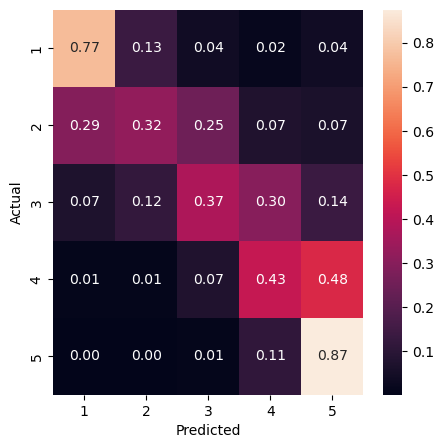

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

plt.show(block=False)

### tf-idf with ngram_range (1,2)

In [20]:
%%time

vectorizer= TfidfVectorizer(ngram_range=(1,2))
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

CPU times: total: 47.6 s
Wall time: 47.8 s


### Logistic Regression

In [21]:
%%time

clf = LogisticRegression(max_iter=1000,solver='saga')

clf.fit(tf_x_train,y_train)

y_test_pred=clf.predict(tf_x_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.76      0.73     11478
           2       0.47      0.31      0.38      8703
           3       0.51      0.38      0.43     12243
           4       0.53      0.46      0.49     25237
           5       0.75      0.88      0.81     50037

    accuracy                           0.67    107698
   macro avg       0.59      0.56      0.57    107698
weighted avg       0.65      0.67      0.65    107698

CPU times: total: 43.5 s
Wall time: 43.6 s


In [22]:
(.73+.38+.43+.49+.81)/5

0.568

In [23]:
%%time
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1)
lr.fit(tf_x_train,y_train)
y_test_pred=lr.predict(tf_x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.76      0.73     11478
           2       0.47      0.31      0.38      8703
           3       0.51      0.38      0.43     12243
           4       0.53      0.46      0.49     25237
           5       0.75      0.88      0.81     50037

    accuracy                           0.67    107698
   macro avg       0.59      0.56      0.57    107698
weighted avg       0.65      0.67      0.65    107698

CPU times: total: 46min 39s
Wall time: 23min 29s


Random Forest
increase ngram 3
-interpretation

#### Random Forest

In [25]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


rf = RandomForestClassifier(max_leaf_nodes=15, n_estimators=1250)
rf.fit(tf_x_train, y_train)
y_train_pred_rf = rf.predict(tf_x_train)
y_test_pred_rf = rf.predict(tf_x_test)

NameError: name 'f1_score' is not defined

In [27]:
 from sklearn.metrics import f1_score
print('Train F1 Score: ', f1_score(y_train, y_train_pred_rf, average='macro'))
print('Test F1 Score: ', f1_score(y_test, y_test_pred_rf, average='macro'))

Train F1 Score:  0.12650400097561892
Test F1 Score:  0.12688876913811137


In [28]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     11478
           2       0.00      0.00      0.00      8703
           3       0.00      0.00      0.00     12243
           4       0.00      0.00      0.00     25237
           5       0.46      1.00      0.63     50037

    accuracy                           0.46    107698
   macro avg       0.09      0.20      0.13    107698
weighted avg       0.22      0.46      0.29    107698



C:\Users\16156\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\16156\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\16156\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Count Vectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
X = df[['text']]
y = df['review_stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [31]:
%%time
vect = CountVectorizer()

X_train_vec = vect.fit_transform(X_train['text'])
X_test_vec = vect.transform(X_test['text'])

CPU times: total: 27.6 s
Wall time: 27.8 s


#### Multinomial NB

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
%%time
nb = MultinomialNB().fit(X_train_vec, y_train)

CPU times: total: 219 ms
Wall time: 212 ms


In [35]:
y_pred = nb.predict(X_test_vec)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6438613048327593

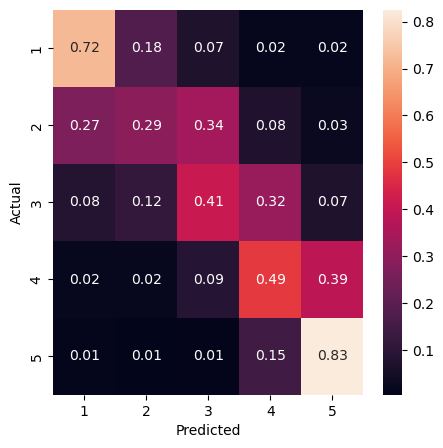

In [38]:
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

plt.show(block=False)

In [39]:
#ratings to binary 0/1
#negative if <=3, positive if >3
df['binary_st'] = np.where(df['review_stars'] <= 3, 0, 1)

In [63]:
X = df[['clean']]
y = df['binary_st']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

vect = CountVectorizer()
X_train_vec = vect.fit_transform(X_train['clean'])
X_test_vec = vect.transform(X_test['clean'])

In [64]:
nb = MultinomialNB().fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

In [65]:
accuracy_score(y_test, y_pred)

0.8837343269313265

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     24621
           1       0.90      0.93      0.92     56968

    accuracy                           0.88     81589
   macro avg       0.87      0.85      0.86     81589
weighted avg       0.88      0.88      0.88     81589



In [67]:
vect.get_feature_names_out()

array(['00', '000', '0005', ..., '饺子', '鳥唐揚げ', '麻辣'], dtype=object)

In [68]:
def important_features(vectorizer,classifier,n=20):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names_out()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]

    print("Important words in negative reviews")

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("-----------------------------------------")
    print("Important words in positive reviews")

    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)

In [69]:
important_features(vect, nb, n=20)

Important words in negative reviews
0 64723.0 food
0 52818.0 order
0 52495.0 good
0 44360.0 place
0 35113.0 like
0 33351.0 come
0 32166.0 time
0 30480.0 service
0 24710.0 go
0 24231.0 wait
0 24101.0 get
0 21790.0 restaurant
0 20651.0 great
0 20360.0 table
0 19913.0 drink
0 19887.0 try
0 19534.0 chicken
0 19198.0 eat
0 19042.0 ask
0 17539.0 minute
-----------------------------------------
Important words in positive reviews
1 133011.0 good
1 107969.0 food
1 104157.0 great
1 95450.0 place
1 58662.0 nashville
1 58042.0 order
1 52575.0 time
1 50387.0 come
1 50232.0 service
1 49752.0 chicken
1 48420.0 like
1 45739.0 love
1 44965.0 try
1 43396.0 delicious
1 39609.0 get
1 35383.0 amazing
1 34810.0 go
1 34254.0 restaurant
1 34065.0 eat
1 32930.0 wait
